### Test particle slurry, focus, field of camera, rotation etc.

One depth of light sheet: 3 cm
Stratified using 800 g salt in bucket 1
Conduinos didn't work
Rotation
Smallest particles (lefovers from sieving).

Focus is farther away, 5.6 m

In [1]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from skimage import img_as_int

In [2]:
frame_a1  = openpiv.tools.imread( '../11Jun19/frames/frame0001.jpg' )
frame_b1  = openpiv.tools.imread( '../11Jun19/frames/frame0003.jpg' )
frame_c1  = openpiv.tools.imread( '../11Jun19/frames/frame0011.jpg' )
frame_d1  = openpiv.tools.imread( '../11Jun19/frames/frame0016.jpg' )
frame_e1  = openpiv.tools.imread( '../11Jun19/frames/frame0021.jpg' )
frame_f1  = openpiv.tools.imread( '../11Jun19/frames/frame0026.jpg' )
frame_g1  = openpiv.tools.imread( '../11Jun19/frames/frame0031.jpg' )
frame_h1  = openpiv.tools.imread( '../11Jun19/frames/frame0036.jpg' )


In [3]:
print(frame_a1.shape)
print(frame_d1.dtype) # result is (1080, 1920) and float64

(1080, 1920)
float64


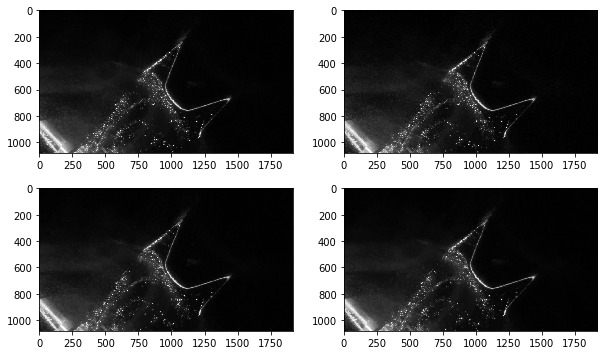

In [4]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(frame_a1, cmap='gray')
ax[0,1].imshow(frame_b1, cmap='gray')
ax[1,0].imshow(frame_c1, cmap='gray')
ax[1,1].imshow(frame_d1, cmap='gray')

In [5]:
frame_a1_int = img_as_int(1-frame_a1)
frame_b1_int = img_as_int(1-frame_b1)
frame_c1_int = img_as_int(1-frame_c1)
frame_d1_int = img_as_int(1-frame_d1)
frame_e1_int = img_as_int(1-frame_e1)
frame_f1_int = img_as_int(1-frame_f1)
frame_g1_int = img_as_int(1-frame_g1)
frame_h1_int = img_as_int(1-frame_h1)

/home/kramosmu/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to int16
  "%s to %s" % (dtypeobj_in, dtypeobj))


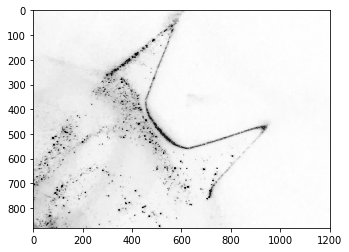

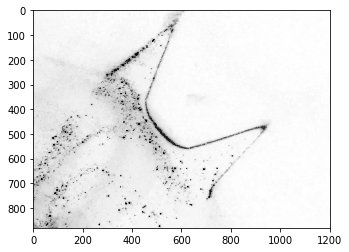

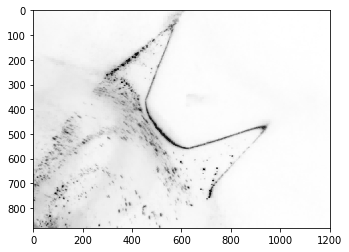

In [6]:
#500:1700
plt.imshow(frame_a1_int[200:,500:1700].astype(np.int32),cmap='gray')
plt.show()
plt.imshow(frame_b1_int[200:,500:1700].astype(np.int32),cmap='gray')
plt.show()

fra1 = frame_a1_int[200:,500:1700].astype(np.int32)
frb1 = frame_b1_int[200:,500:1700].astype(np.int32)
frc1 = frame_c1_int[200:,500:1700].astype(np.int32)
frd1 = frame_d1_int[200:,500:1700].astype(np.int32)
fre1 = frame_e1_int[200:,500:1700].astype(np.int32)
frf1 = frame_f1_int[200:,500:1700].astype(np.int32)
frg1 = frame_g1_int[200:,500:1700].astype(np.int32)
frh1 = frame_h1_int[200:,500:1700].astype(np.int32)

plt.imshow(fra1+frb1+frc1+frd1+fre1+frf1+frg1+frh1,cmap='gray')
plt.show()



Notes:

    window_size > overlap

In [7]:
window_size = 32
overlap = 16
dt = 2/30
search_area_size = 48

u, v, sig2noise = openpiv.process.extended_search_area_piv(fra1, frb1,
                                                           window_size, 
                                                           overlap=overlap, 
                                                           dt=dt, 
                                                           search_area_size=search_area_size, 
                                                           sig2noise_method='peak2peak')
print(np.shape(u), np.shape(v), np.shape(sig2noise))


(54, 74) (54, 74) (54, 74)


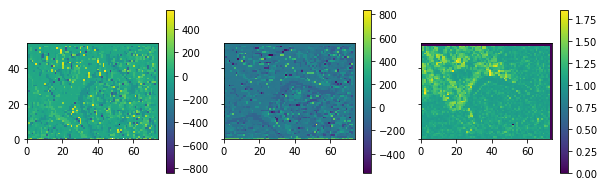

In [8]:
fig, ax = plt.subplots(1,3,figsize=(10,3.0), sharey=True)

pc_u = ax[0].pcolormesh(u)
plt.colorbar(pc_u, ax=ax[0])
ax[0].set_aspect(1)

pc_v = ax[1].pcolormesh(v)
plt.colorbar(pc_v, ax=ax[1])
ax[1].set_aspect(1)

pc_s2n = ax[2].pcolormesh(sig2noise)
plt.colorbar(pc_s2n, ax=ax[2])
ax[2].set_aspect(1)


In [9]:
x, y = openpiv.process.get_coordinates( image_size=fra1.shape, window_size=window_size, overlap=overlap )

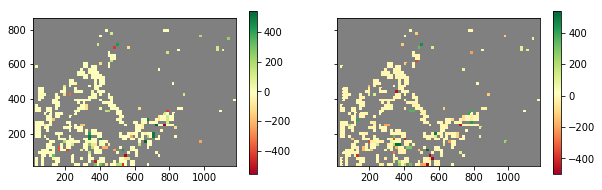

In [10]:
umask, vmask, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3)

cmap = plt.cm.RdYlGn
cmap.set_bad('gray', 1)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3) ,sharey = True)
mesh1 = ax1.pcolormesh(x,y,umask, cmap=cmap)
mesh2 = ax2.pcolormesh(x,y,vmask, cmap=cmap)
plt.colorbar(mesh1, ax=ax1)
plt.colorbar(mesh2, ax=ax2)

ax1.set_aspect(1)
ax2.set_aspect(1)


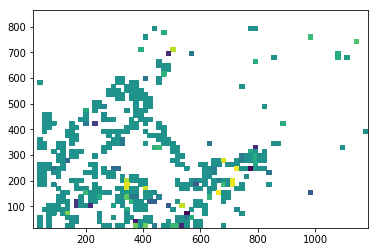

In [11]:
uval, vval, mask = openpiv.validation.global_val( umask, vmask, (-5000, 5000), (-5000, 5000) )
plt.pcolor(x,y,uval)

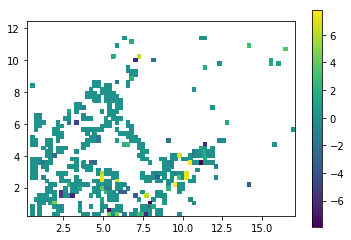

In [12]:
# scaling factor is in pix/cm
sca_factor = 69.4686
xsca, ysca, usca, vsca = openpiv.scaling.uniform(x, y, uval, vval, scaling_factor = sca_factor )
pc = plt.pcolor(xsca,ysca,usca)
ax = plt.gca()
plt.colorbar(pc, ax=ax)
ax.set_aspect(1)

In [13]:
openpiv.tools.save(xsca, ysca, usca, vsca, mask, 'img02.txt' )

/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/quiver.py:650: RuntimeWarning: Mean of empty slice.
  amean = a.mean()


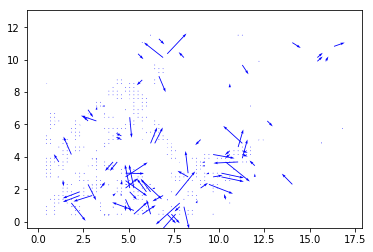

In [14]:
openpiv.tools.display_vector_field('img02.txt', width=0.0025)


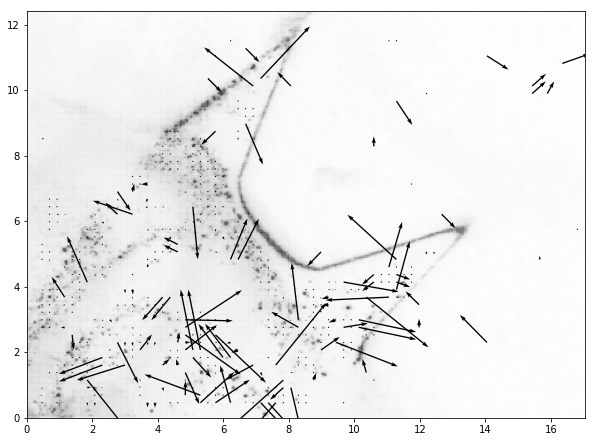

In [15]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.pcolormesh(np.linspace(0,np.max(xsca),1200),np.linspace(0,np.max(ysca),880),
              np.flipud(fra1+frb1), alpha=0.1, cmap='gray')
ax.quiver(xsca,ysca,usca,vsca, color='k', scale=70)
ax.set_aspect(1)


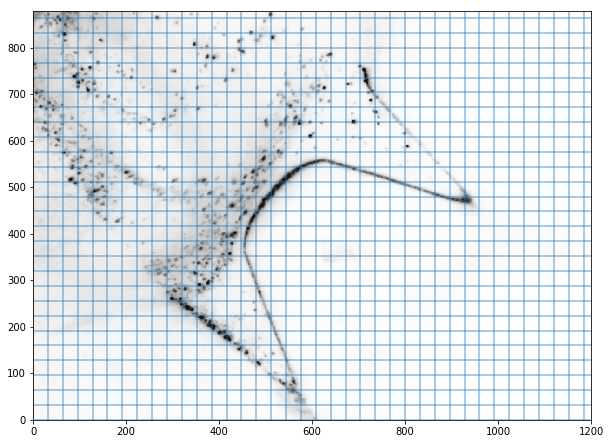

In [16]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.pcolormesh(fra1+frb1+frc1+frd1, cmap='gray')
ax.set_aspect(1)

for ii in range(int(np.shape(fra1)[1]/window_size)+1):
    ax.axvline(ii*window_size, alpha=0.5)
    
for ii in range(int(np.shape(fra1)[0]/window_size)+1):
    ax.axhline(ii*window_size, alpha=0.5)

### Process all pairs (every 2 frames)

In [18]:
for ii in range(328,500,2):#330-2,2):

    fr_num_a = ('%04d' %ii)
    fr_num_b = ('%04d' %(ii+2))
    
    file_a = ('../11Jun19/frames/frame%s.jpg' %fr_num_a)
    file_b = ('../11Jun19/frames/frame%s.jpg' %fr_num_b)
    fr_a  = openpiv.tools.imread(file_a)
    fr_b  = openpiv.tools.imread(file_b)
    #print(file_a, file_b)
    
    frame_a_int = img_as_int(1-fr_a)
    frame_b_int = img_as_int(1-fr_b)
    
    fra = frame_a_int[200:,500:1700].astype(np.int32)
    frb = frame_b_int[200:,500:1700].astype(np.int32)

    window_size = 32
    overlap = 16
    dt = 5/30
    search_area_size = 48

    u, v, sig2noise = openpiv.process.extended_search_area_piv(fra, frb,
                                                               window_size, 
                                                               overlap=overlap, 
                                                               dt=dt, 
                                                               search_area_size=search_area_size, 
                                                               sig2noise_method='peak2peak')
    x, y = openpiv.process.get_coordinates(image_size=fra.shape, window_size=window_size, overlap=overlap)
    
    umask, vmask, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3)
    
    uval, vval, mask = openpiv.validation.global_val( umask, vmask, (-5000, 5000), (-5000, 5000) )

    sca_factor = 69.4686 # pix/cm
    xsca, ysca, usca, vsca = openpiv.scaling.uniform(x, y, uval, vval, scaling_factor = sca_factor )

    openpiv.tools.save(xsca, ysca, usca, vsca, mask, '../11Jun19/frames/frame_%s.txt' %fr_num_a)


/home/kramosmu/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to int16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [17]:
for ii in range(140,,1):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes()
    ax.set_aspect(1)

    tt = 2*(ii)+1
    num = ('%04d' %tt)
    num_seq = ('%04d' %ii)
    filename = '../11Jun19/frames/frame_%s.txt' %num
    imgname = '../11Jun19/frames/frame%s.jpg' %num
    
    frame = openpiv.tools.imread(imgname)
    frame_int = img_as_int(1-frame)
    frame_crop = frame_int[200:,500:1700].astype(np.int32)
    
    df = pd.read_csv(filename,delim_whitespace=True, header=None, names=['x','y','u','v','bla'])
    U = np.array(df['u'])
    V = np.array(df['v'])
    X = np.array(df['x'])
    Y = np.array(df['y'])
    
    Xfr = np.linspace(0,np.max(X),np.shape(frame_crop)[1])
    Yfr = np.linspace(0,np.max(Y),np.shape(frame_crop)[0])

    ax.pcolormesh(Xfr,Yfr,np.flipud(frame_crop),cmap='gray_r')
    
    spd = np.sqrt(U**2+V**2)
    spd_masked = np.ma.masked_greater(spd,0.9)
    mask = np.ma.getmask(spd_masked)
    UU = np.ma.masked_array(U, mask=mask)
    VV = np.ma.masked_array(V, mask=mask)
    XX = np.ma.masked_array(X, mask=mask)
    YY = np.ma.masked_array(Y, mask=mask)
    ax.quiver(XX,YY,UU,VV,pivot='mid', color='orange',scale=10)
    ax.set_title('frame %s' %num)
    ax.set_xlabel('cm')
    ax.set_ylabel('cm')
    plt.savefig('../11Jun19/frames/quiv_%s.png' %num_seq, format='png')
    plt.close()


/home/kramosmu/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to int16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [1]:
2/30

0.06666666666666667